In [5]:
from IPython.display import display, Image

In [2]:
import matplotlib
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import platform

In [6]:
path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system()=="Darwin":
    rc('font', family='AppleGothic')
else:
    print("Unknown System")

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
import numpy as np

In [8]:
# n_features : 변수의 개수
# feature_names : 변수의 이름 
# model : 모델 
def plot_feature_important_up(model, n_features, feature_names):
  imp = model.feature_importances_     # feature의 중요도 
  plt.barh(range(n_features) , imp, align='center')  # 그래프(가로 막대 그래프)
  plt.yticks(np.arange(n_features), feature_names)  #y축의 축의 값
  plt.xlabel("feature importance")   # x축 레이블(제목)
  plt.ylabel("feature")              # y축 제목
  plt.ylim(-1, n_features)           # y축의 범위 지정 

In [9]:
from sklearn.ensemble import GradientBoostingClassifier

In [12]:
cancer = load_breast_cancer()

X = cancer.data
y = cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)


GradientBoostingClassifier(random_state=0)

In [14]:
# 정확도 확인
print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.965


In [16]:
# model : 모델
# n_features : feature(변수의 개수)
# feature_names : 특성의 이름
def plot_feature_important_up(model, n_features, feature_names):
  imp = model.feature_importances_     # feature의 중요도 
  plt.barh(range(n_features) , imp, align='center')  # 그래프(가로 막대 그래프)
  plt.yticks(np.arange(n_features), feature_names)  #y축의 축의 값
  plt.xlabel("feature importance")   # x축 레이블(제목)
  plt.ylabel("feature")              # y축 제목
  plt.ylim(-1, n_features)           # y축의 범위 지정 

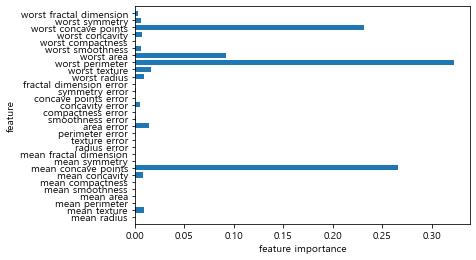

In [18]:
gbrt = GradientBoostingClassifier (random_state=0,
                                    max_depth=1,
                                    learning_rate=0.1)
gbrt.fit(X_train, y_train)

feature_num = X_train.shape[1]
feature_names = cancer.feature_names

plot_feature_important_up(gbrt, feature_num, feature_names)

In [21]:
import seaborn as sns
import pandas as pd

<AxesSubplot:title={'center':'feature importances'}>

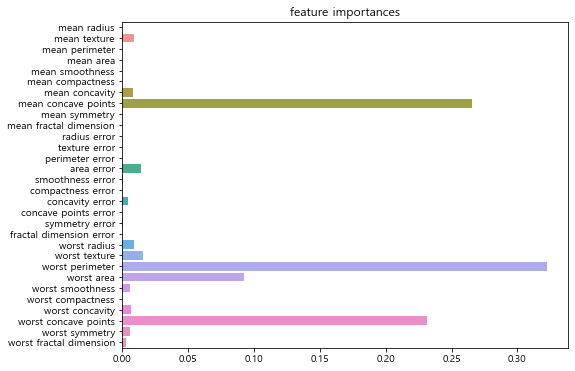

In [22]:
fea_imp_values = gbrt.feature_importances_
importances = pd.Series(fea_imp_values, index=feature_names)

plt.figure(figsize=(8,6))
plt.title('feature importances')
sns.barplot(x=importances, y=importances.index)

In [23]:
df = pd.read_csv("./data/train.csv")

In [25]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [32]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [41]:
sel = ['PassengerId', 'Pclass', 'SibSp',
       'Parch', 'Fare']

X = df[sel]
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(random_state=0)

In [42]:
# 정확도 확인
print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

훈련 세트 정확도: 0.834
테스트 세트 정확도: 0.713


<AxesSubplot:title={'center':'feature importances'}>

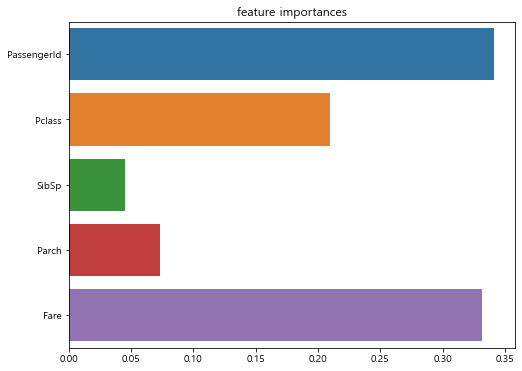

In [45]:
fea_imp_values = gbrt.feature_importances_
importances = pd.Series(fea_imp_values, index=sel)

plt.figure(figsize=(8,6))
plt.title('feature importances')
sns.barplot(x=importances, y=sel)

In [46]:
n_estimators = [10, 100, 1000]
for i in n_estimators:
    for j in range(1,6):
        print("max_depth = ",j)
        print("n_estimators = ",i)
        for k in range(1,6):
            gbrt = GradientBoostingClassifier(n_estimators=i, random_state=0, max_depth=j, learning_rate= 0.1 * k)
            gbrt.fit(X_train, y_train)
            print("learning_rate = ",0.1 * k)
            print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
            print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))
        print()

max_depth =  1
n_estimators =  10
learning_rate =  0.1
훈련 세트 정확도: 0.680
테스트 세트 정확도: 0.709
learning_rate =  0.2
훈련 세트 정확도: 0.680
테스트 세트 정확도: 0.709
learning_rate =  0.30000000000000004
훈련 세트 정확도: 0.714
테스트 세트 정확도: 0.722
learning_rate =  0.4
훈련 세트 정확도: 0.719
테스트 세트 정확도: 0.726
learning_rate =  0.5
훈련 세트 정확도: 0.714
테스트 세트 정확도: 0.722

max_depth =  2
n_estimators =  10
learning_rate =  0.1
훈련 세트 정확도: 0.717
테스트 세트 정확도: 0.726
learning_rate =  0.2
훈련 세트 정확도: 0.717
테스트 세트 정확도: 0.731
learning_rate =  0.30000000000000004
훈련 세트 정확도: 0.722
테스트 세트 정확도: 0.717
learning_rate =  0.4
훈련 세트 정확도: 0.734
테스트 세트 정확도: 0.726
learning_rate =  0.5
훈련 세트 정확도: 0.735
테스트 세트 정확도: 0.704

max_depth =  3
n_estimators =  10
learning_rate =  0.1
훈련 세트 정확도: 0.735
테스트 세트 정확도: 0.740
learning_rate =  0.2
훈련 세트 정확도: 0.759
테스트 세트 정확도: 0.735
learning_rate =  0.30000000000000004
훈련 세트 정확도: 0.769
테스트 세트 정확도: 0.735
learning_rate =  0.4
훈련 세트 정확도: 0.771
테스트 세트 정확도: 0.735
learning_rate =  0.5
훈련 세트 정확도: 0.781
테스트 세트 정확도: 0.709

max_dep

In [47]:
%%time 

n_num = [100, 500, 1000, 3000]
learning_rate = [0.1, 0.01, 0.05, 0.001, 0.005]
max_depth = [1,3,5,7,9]

for i1, num1 in enumerate(n_num):
    print("나무의 개수 : ", num1)
    for i2, num2 in enumerate(learning_rate):
        print("learning_rate : ", num2)
        for i3, num3 in enumerate(max_depth): 
            print("max_depth : ", num3)
            model = GradientBoostingClassifier(max_depth = num3, 
                                               learning_rate=num2,
                                               n_estimators=num1,
                                               random_state=10)
            model.fit(X_train, y_train)
            
            score_tr = model.score(X_train, y_train)
            score_test = model.score(X_test, y_test)
            
            print("{0:.3f}, {0:.3f}".format(score_tr, score_test) )

나무의 개수 :  100
learning_rate :  0.1
max_depth :  1
0.720, 0.720
max_depth :  3
0.834, 0.834
max_depth :  5
0.954, 0.954
max_depth :  7
1.000, 1.000
max_depth :  9
1.000, 1.000
learning_rate :  0.01
max_depth :  1
0.666, 0.666
max_depth :  3
0.731, 0.731
max_depth :  5
0.780, 0.780
max_depth :  7
0.868, 0.868
max_depth :  9
0.945, 0.945
learning_rate :  0.05
max_depth :  1
0.716, 0.716
max_depth :  3
0.784, 0.784
max_depth :  5
0.892, 0.892
max_depth :  7
0.985, 0.985
max_depth :  9
1.000, 1.000
learning_rate :  0.001
max_depth :  1
0.614, 0.614
max_depth :  3
0.614, 0.614
max_depth :  5
0.614, 0.614
max_depth :  7
0.614, 0.614
max_depth :  9
0.614, 0.614
learning_rate :  0.005
max_depth :  1
0.614, 0.614
max_depth :  3
0.713, 0.713
max_depth :  5
0.754, 0.754
max_depth :  7
0.834, 0.834
max_depth :  9
0.906, 0.906
나무의 개수 :  500
learning_rate :  0.1
max_depth :  1
0.737, 0.737
max_depth :  3
0.982, 0.982
max_depth :  5
1.000, 1.000
max_depth :  7
1.000, 1.000
max_depth :  9
1.000, 1.000
